In [1]:
import copy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 熱伝導方程式

まず、簡単な例として熱伝導方程式を考えましょう。一次元ならこんな方程式です。

$$\frac{\partial T}{\partial t}=\frac{\partial^{2} T}{\partial x^{2}}$$

ここで、$T(x;t)$ は、時刻 $t$ における位置 $x$の温度です。
周期境界条件をとるので、輪になっている針金の温度を表現していると思ってください。
簡単のため、熱伝導率を $1$ としています。

さて、この方程式はフーリエ変換で厳密に解けますが、差分化して数値的に解くことにします。
空間方向は刻み幅 $1$ で、時間方向は時間刻み $h$ で離散化しましょう。
$t=0$ を 0ステップ目とすると、
nステップ目、i番目の位置の温度を $v^{i}_{n}$ で表現します。
先ほどの微分方程式を、空間方向は中央差分、時間方向は一次のオイラー法で差分化すると、

$$v^{i}_{n+1} = v^{i}_{n} + h(v^{i−1}_{n}−2v^{i}_{n} + v^{i+1}_{n})$$

と書き換えられます。初期条件として $v^{i}_{0}$ が与えられれば、上記の式に従って
$v^{i}_{1}, v^{i}_{2}, \cdots, v^{i}_{n}$
と、任意の時刻、場所の温度が求められることになります。これを素直にコードに実装してみましょう。

空間を $N$ 分割し、周期境界条件を課して、初期条件として山型の温度分布を与えます。
適当な時間刻みで時間発展させ、途中の温度を重ねてプロットする `Python` コードはこんな感じになるでしょう。

In [2]:
def calc(v, h):
    v_next = copy.copy(v)
    N = len(v)
    for i in range(N):
        i1 = (i+1) % N
        i2 = (i - 1 + N) % N
        v_next[i] = v[i] + (v[i1] - 2.0*v[i] + v[i2])*h
    return v_next

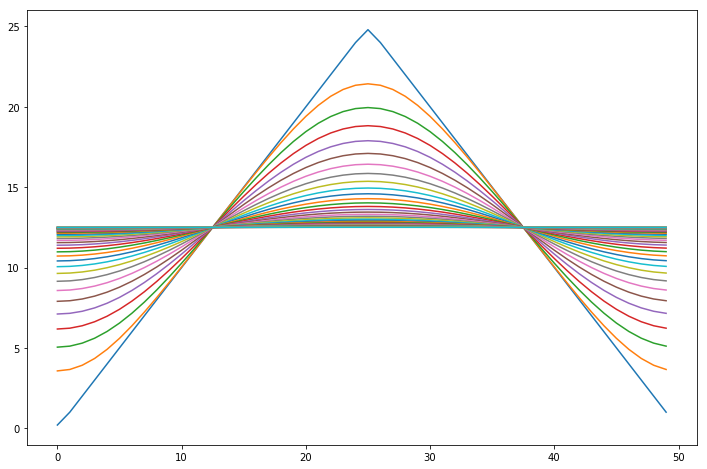

In [3]:
N = 50 #32
Steps = N*100
v = np.array([min(x, N-x) for x in range(N)], dtype='float64')
h = 0.1

r = []
for i in range(Steps):
    v = calc(v,h)
    if (i % 100) == 0: r.append(v)

plt.figure(figsize=(12,8))
for v in r: plt.plot(v)

初期条件として山型の温度分布を与えたのが、だんだんとなまっていき、最終的に直線、すなわち一様な温度分布になったことがわかります。
さて、先ほどの離散化した式ですが、以下のような行列とベクトルの積の成分を表示したものと思うことができます。

$$\vec{v_{n+1}} = A \vec{v_{n}}$$

ただし、$A$
は以下のような形をした N行N列の行列です。

$$\begin{pmatrix} 
1-2h & h &&&&& h \\
h& 1-2h & h &&&& \\
& h & 1-2h & h &&& \\
&&&& \ddots && \\
&&&& h & 1-2h & h \\
h &&&&& h & 2h-1 %\\
\end{pmatrix}
$$ 

もともと時間発展は微分方程式で記述されていましたが、離散化により状態がベクトルで表現され、そのベクトルに行列をかけると次のステップの状態が得られる、という行列とベクトルの問題に帰着されました。離散化により自然に線形代数が出てきたのがわかるかと思います。
この、「現在の温度分布を表すベクトルに行列をかけると次のステップの温度分布が出てくる」という計算を素直にコードに落とすとこんな感じになるでしょう。

In [10]:
# 行列Aを作る
A = np.zeros((N, N))
for i in range(N):
    i1 = (i + 1) % N
    i2 = (i - 1 + N) % N
    A[i][i] = 1.0 - 2.0*h
    A[i][i1] = h
    A[i][i2] = h
    
print(A, type(A))

[[0.8 0.1 0.  ... 0.  0.  0.1]
 [0.1 0.8 0.1 ... 0.  0.  0. ]
 [0.  0.1 0.8 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.8 0.1 0. ]
 [0.  0.  0.  ... 0.1 0.8 0.1]
 [0.1 0.  0.  ... 0.  0.1 0.8]] <class 'numpy.ndarray'>


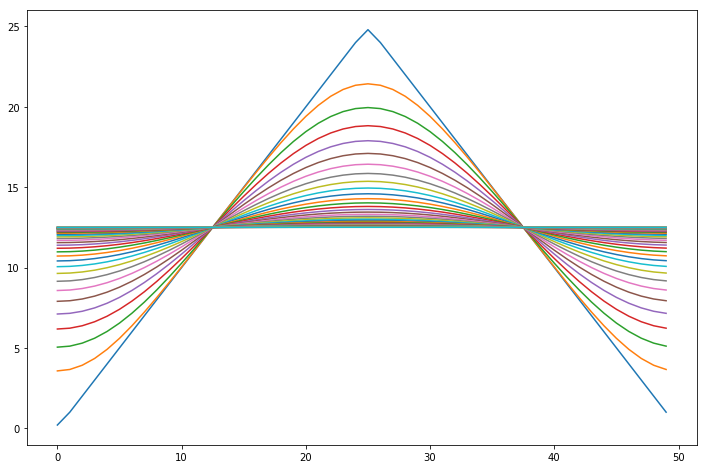

In [5]:
v = np.array([min(x, N-x) for x in range(N)], dtype='float64')

r = []
for i in range(Steps):
    v = A.dot(v) # Aをかけると次のステップの状態が得られる
    if (i % 100) == 0: r.append(v)

plt.figure(figsize=(12,8))
for v in r: plt.plot(v)

<class 'numpy.ndarray'>


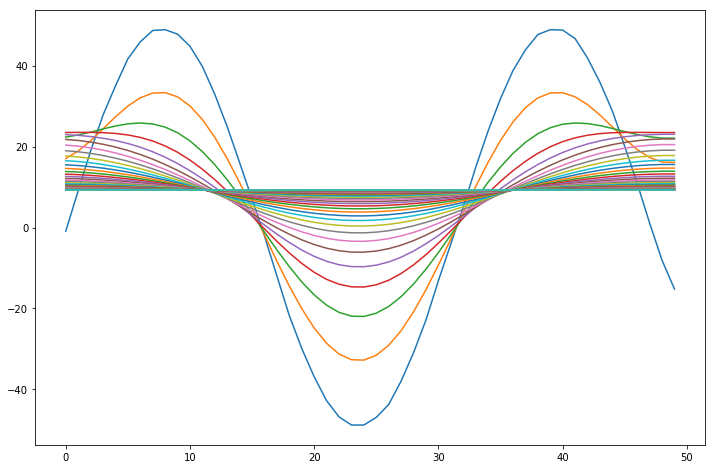

In [9]:
import math
v = np.array([int(N*math.sin(x/5)) for x in range(N)], dtype='float64')

plt.figure(figsize=(12,8))

r = []
for i in range(Steps):
    v = A.dot(v) # Aをかけると次のステップの状態が得られる
    if (i % 100) == 0: r.append(v)

print(type(r[0]))        
for v in r: 
    plt.plot(v)